In [102]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [72]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [103]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import easyocr
import tensorflow as tf
import numpy as np
import imutils
import cv2
from tensorflow.keras.optimizers.legacy import Adam


In [104]:
base_dir=r"C:\Users\SAI HARSHIKA CHAVVA\Desktop\medicines"

In [105]:


IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    'C:\\Users\\SAI HARSHIKA CHAVVA\\Desktop\\medicines\\train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    'C:\\Users\\SAI HARSHIKA CHAVVA\\Desktop\\medicines\\train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)



Found 98 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


In [106]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))

In [107]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [150]:
cnn.fit(train_datagen,epochs=26,validation_data=test_datagen)

Epoch 1/26
2/2 [==============================] - 2s 2s/step - loss: 1.4701 - accuracy: 0.4388 - val_loss: 6.9542 - val_accuracy: 0.1000
Epoch 2/26
2/2 [==============================] - 2s 823ms/step - loss: 1.4959 - accuracy: 0.4184 - val_loss: 6.9607 - val_accuracy: 0.1000
Epoch 3/26
2/2 [==============================] - 2s 2s/step - loss: 1.3781 - accuracy: 0.4898 - val_loss: 6.6448 - val_accuracy: 0.1000
Epoch 4/26
2/2 [==============================] - 3s 2s/step - loss: 1.4154 - accuracy: 0.4796 - val_loss: 6.4527 - val_accuracy: 0.1000
Epoch 5/26
2/2 [==============================] - 3s 952ms/step - loss: 1.4221 - accuracy: 0.5102 - val_loss: 6.6879 - val_accuracy: 0.1000
Epoch 6/26
2/2 [==============================] - 2s 825ms/step - loss: 1.3713 - accuracy: 0.5204 - val_loss: 7.0061 - val_accuracy: 0.1000
Epoch 7/26
2/2 [==============================] - 2s 804ms/step - loss: 1.3598 - accuracy: 0.5204 - val_loss: 7.1639 - val_accuracy: 0.1000
Epoch 8/26
2/2 [=============

In [151]:
predictions = cnn.predict(test_datagen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_datagen.classes

1/1 [==============================] - 0s 163ms/step


In [152]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 30.00%


In [172]:
# Predict the label of the test_images
pred = cnn.predict(test_datagen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_datagen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

1/1 [==============================] - 0s 158ms/step
The first 5 predictions: ['Cardacemeto', 'Ibuprofen', 'Ibuprofen', 'Roseday', 'Roseday']


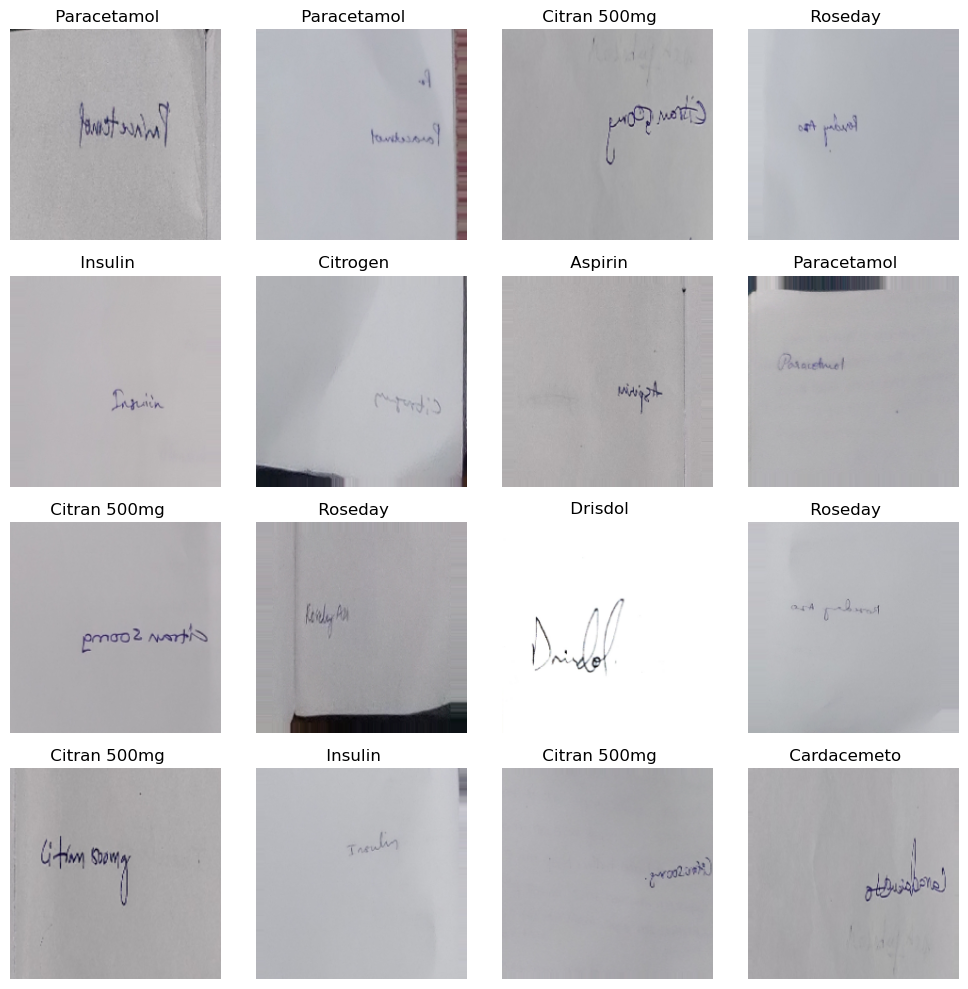

In [119]:
sample_images, sample_labels = next(train_datagen)  # Get a batch of images and labels

# Get the class names from the generator
class_names = list(train_datagen.class_indices.keys())

# Create a grid of 4x4 subplots to display the images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()  # Flatten the axes for easier iteration

for i in range(16):  # Display 16 images
    axes[i].imshow(sample_images[i])
    axes[i].set_title(" {}    ".format(class_names[np.argmax(sample_labels[i])]))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [168]:
def detect(text):
    IMAGE_PATH = 'C:\\Users\\SAI HARSHIKA CHAVVA\\Desktop\medicines\\train\\Drisdol\\Drisdol\\1686320412555.jpg'
    reader = easyocr.Reader(['en'])
    result = reader.readtext(IMAGE_PATH,paragraph="False")
    result
    font = cv2.FONT_HERSHEY_SIMPLEX
    top_left = tuple(result[0][0][0])
    bottom_right = tuple(result[0][0][2])
    img = cv2.imread(IMAGE_PATH)
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,255),3)
    img = cv2.putText(img,text,bottom_right, font, 0.5,(255,0,0),2,cv2.LINE_AA)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

Loading the saved model from the file and testing.....

1/1 [==============================] - 0s 153ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


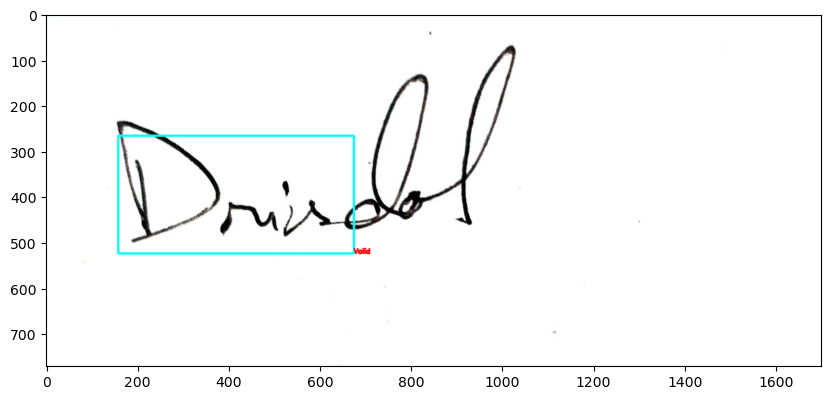

Valid


In [174]:
print("Loading the saved model from the file and testing.....\n")
cnn.save('cnn.h5')
my_model=load_model('cnn.h5')

img = image.load_img('C:\\Users\\SAI HARSHIKA CHAVVA\\Desktop\\medicines\\train\\Drisdol\\Drisdol\\1686320412555.jpg',target_size=(224,224))
#plt.imshow(img)

X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
val = my_model.predict([X])
if np.any(val == 1):
    detect("")
else :
    detect("")